In [31]:
# Common Imports
import numpy as np
import pandas as pd
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('../sample_data/water.csv')
df.date = pd.to_datetime(df.date.astype(int) - 1, format='%Y%m%d%H')
df.head()

,date,water_level,tagsn
0,2018-01-01 00:00:00,2.2775,4288
1,2018-01-01 00:00:00,2.4888,4287
2,2018-01-01 00:00:00,2.5459,4285
3,2018-01-01 01:00:00,2.3980,4285
4,2018-01-01 01:00:00,2.3396,4287


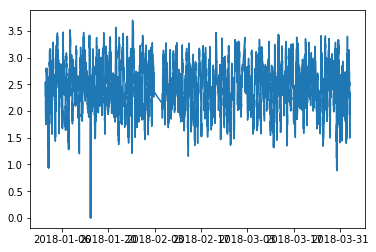

In [33]:
plt.plot(df.date, df.water_level)

# Grouping

## Average every n rows

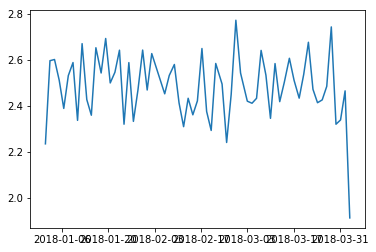

In [48]:
n = 100 
date = df.groupby(np.arange(df.shape[0]) // n)['date'].first()
mean = df.groupby(np.arange(df.shape[0]) // n)['water_level'].mean()
plt.plot(date, mean)

## Group by months

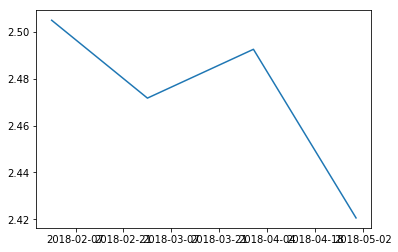

In [47]:
mean = df.groupby(pd.Grouper(key='date', freq='1M'))['water_level'].mean()
plt.plot(mean)

## Group by range

In [52]:
df.groupby(pd.cut(df['water_level'], np.arange(0, 4.5, 0.5), include_lowest=True)).mean()

,water_level,tagsn
water_level,,
"(-0.001, 0.5]",0.000000,4286.500000
"(0.5, 1.0]",0.922825,4288.000000
"(1.0, 1.5]",1.369042,4287.845070
"(1.5, 2.0]",1.827194,4287.157303
"(2.0, 2.5]",2.273393,4286.735692
"(2.5, 3.0]",2.736486,4286.528133
"(3.0, 3.5]",3.159221,4286.279070
"(3.5, 4.0]",3.565219,4285.750000


In [53]:
df.groupby(pd.cut(df['water_level'], np.arange(0, 4.5, 0.5), right=False)).mean()

,water_level,tagsn
water_level,,
"[0.0, 0.5)",0.000000,4286.500000
"[0.5, 1.0)",0.922825,4288.000000
"[1.0, 1.5)",1.369042,4287.845070
"[1.5, 2.0)",1.827194,4287.157303
"[2.0, 2.5)",2.273294,4286.736451
"[2.5, 3.0)",2.736273,4286.526854
"[3.0, 3.5)",3.159016,4286.281290
"[3.5, 4.0)",3.565219,4285.750000
